<a href="https://colab.research.google.com/github/kgosal2001/Data_analytics/blob/main/Karanvir_Gosal_Hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Segmentation using Cluster Analysis

# Case Description

You are working for an international bank. The credit department is reviewing its offerings and wants to get a better understanding of its current customers. You have been tasked with performing customer segmentation analysis. You decide to perform cluster analysis using the k-means clustering algorithm to identify groups of similar customers.

# Purpose of the Analysis
As a business data analyst, your task is to segment bank's customers based on their similarities on certain relevant attributes. The bank's marketing department will then use the identified segments to tailor different marketing strategies for each segment.

# The Data

The dataset contains 1000 instances (rows) and a number of attributes. This dataset is provided by a German bank. Each row represents a bank customer who borrowed from the bank. 

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (good or bad credit risk)<br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/credit_data.csv')

In [ ]:
#show data frame
df.head(4)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## DATA PREPROCESSING
---

In [ ]:
#check the null values
df.notnull().sum()

Unnamed: 0          1000
Age                 1000
Sex                 1000
Job                 1000
Housing             1000
Saving accounts      817
Checking account     606
Credit amount       1000
Duration            1000
Purpose             1000
dtype: int64

In [ ]:
#check the null values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

#### The three numeric variables (age, duration of loan, credit amount) have no missing values

### Create a subset of the three numeric variables for clustering

In [ ]:
num_df = df[['Age', 'Duration', 'Credit amount']]

### Standardize (Perform Standard Scaling)

In [ ]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [ ]:
#show scaled dataset values
num_df_scaled

array([[ 2.76645648, -1.23647786, -0.74513141],
       [-1.19140394,  2.24819436,  0.94981679],
       [ 1.18331231, -0.73866754, -0.41656241],
       ...,
       [ 0.21583532, -0.73866754, -0.87450324],
       [-1.10345149,  1.9992892 , -0.50552769],
       [-0.75164167,  1.9992892 ,  0.46245715]])

In [ ]:
#show scaled dataset shape
num_df_scaled.shape

(1000, 3)

In [ ]:
# num_df_scaled is a multi-dimensional numpy array
# The following code converts it into a pandas data frame

df9 = pd.DataFrame(num_df_scaled)
df9.describe()

,0,1,2
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.597123e-17,1.332268e-16,7.771561e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.455261e+00,-1.402415e+00,-1.070865e+00
25%,-7.516417e-01,-7.386675e-01,-6.754833e-01
50%,-2.239269e-01,-2.408572e-01,-3.373443e-01
75%,5.676451e-01,2.569531e-01,2.484620e-01
max,3.470076e+00,4.239436e+00,5.370789e+00


# Perform k-Means Clustering

## First, use the Elbow method to determine optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans

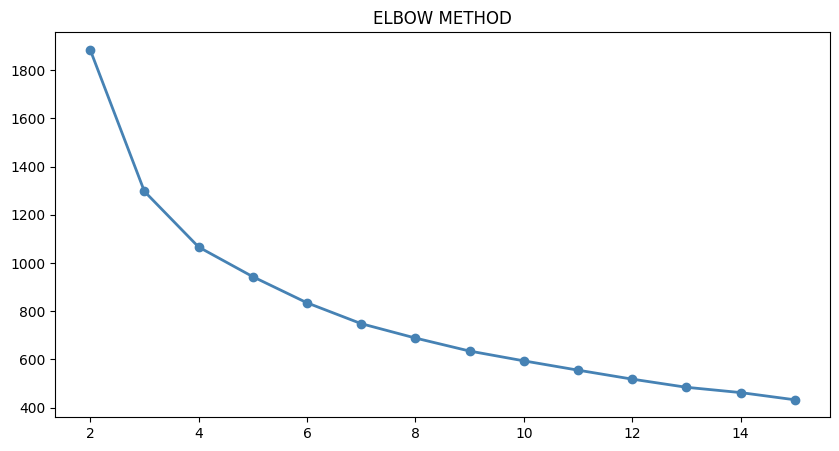

In [ ]:
# NOTE: Inertia refers to within cluster sum of squares (WCSS)

# First create an emty list to store inertia values for k= 2-16
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

### Fit the clustering model for 3 clusters

In [ ]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(num_df_scaled)

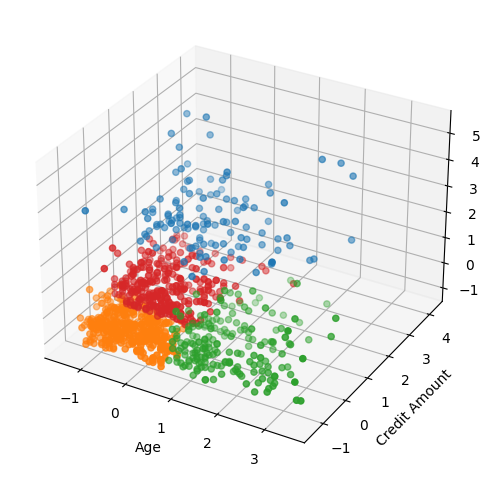

In [ ]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Credit Amount')
ax.set_zlabel('Duration')

for i in range(4):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])
    


In [ ]:
# Create a data frame for sumarized results
df_clustered = df[['Age', 'Duration', 'Credit amount']]

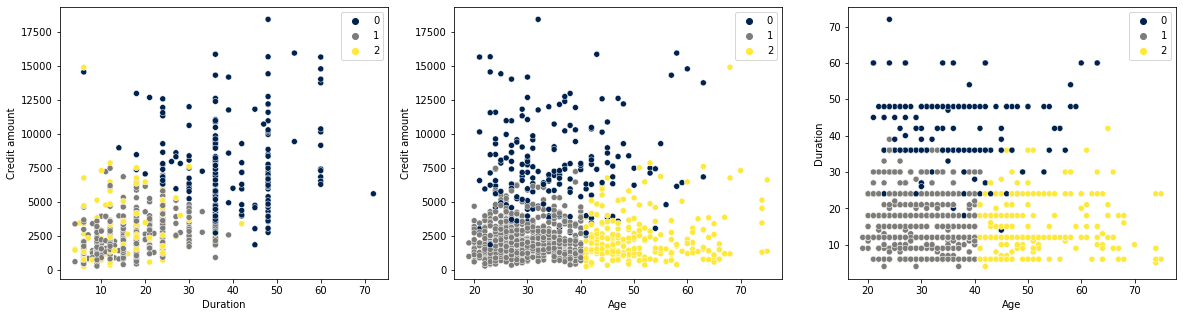

In [ ]:
# Draw bi-variate scatter plots

fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(df['Duration'], df['Credit amount'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(df['Age'], df['Credit amount'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(df['Age'], df['Duration'], hue=clusters, ax=ax[2], palette='cividis');

### Summarize the Results

In [ ]:
# Create a data frame for sumarized results
df_clustered = df[['Age', 'Duration', 'Credit amount']]

In [ ]:
df_clustered.head()

,Age,Duration,Credit amount
0,67,6,1169
1,22,48,5951
2,49,12,2096
3,45,42,7882
4,53,24,4870


In [ ]:
# Add a cluster# column to the data frame
# to see which customers are in which cluster
df_clustered['cluster'] = clusters
df_clustered.head()

,Age,Duration,Credit amount,cluster
0,67,6,1169,2
1,22,48,5951,0
2,49,12,2096,2
3,45,42,7882,0
4,53,24,4870,2


In [ ]:
# Calculate cluster means
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,36.341880,41.034188,9359.487179
1,29.801527,12.407125,1730.073791
2,52.843434,15.969697,2331.484848
3,31.229452,27.616438,3543.304795


## Interpreting the Results

* Cluster 0 are in their thirties, with longest loan duration, and highest credit amount.
* Cluster 1 are customers in their late 20s and low thirties, have the moderate duration and the smallest credit
* Cluster 2 are the oldest customers with low loan duration and the moderate credit amount
* Cluster 3 are customers in their late 20s and low thirties, have the moderate loan duration and moderate credit amount. (Red)